In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns


#Carga de dataframes

In [ ]:
df_players = pd.read_csv("/content/t_players.csv")
df_resultados = pd.read_csv("/content/t_resultados.csv")
df_teams = pd.read_csv("/content/t_teams.csv")


In [ ]:
df_players.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [ ]:
df_teams.head()

,team_name,common_name,season,country,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,wins_home,...,goals_conceded_min_61_to_70,goals_conceded_min_71_to_80,goals_conceded_min_81_to_90,draw_percentage_overall,draw_percentage_home,draw_percentage_away,loss_percentage_ovearll,loss_percentage_home,loss_percentage_away,over145_corners_percentage
0,Arsenal FC,Arsenal,2018/2019,England,38,19,19,0,21,14,...,12,1,8,18,16,21,26,11,42,5
1,Tottenham Hotspur FC,Tottenham Hotspur,2018/2019,England,38,19,19,0,23,12,...,4,8,10,5,11,0,34,26,42,11
2,Manchester City FC,Manchester City,2018/2019,England,38,19,19,0,32,18,...,4,2,3,5,0,11,11,5,16,5
3,Leicester City FC,Leicester City,2018/2019,England,38,19,19,0,15,8,...,7,1,9,18,16,21,42,42,42,5
4,Crystal Palace FC,Crystal Palace,2018/2019,England,38,19,19,0,14,5,...,8,8,11,18,26,11,45,47,42,11


In [ ]:
df_teams.sort_values(by='wins',ascending=False)

,team_name,common_name,season,country,matches_played,matches_played_home,matches_played_away,suspended_matches,wins,wins_home,...,goals_conceded_min_61_to_70,goals_conceded_min_71_to_80,goals_conceded_min_81_to_90,draw_percentage_overall,draw_percentage_home,draw_percentage_away,loss_percentage_ovearll,loss_percentage_home,loss_percentage_away,over145_corners_percentage
2,Manchester City FC,Manchester City,2018/2019,England,38,19,19,0,32,18,...,4,2,3,5,0,11,11,5,16,5
10,Liverpool FC,Liverpool,2018/2019,England,38,19,19,0,30,17,...,3,3,4,18,11,26,3,0,5,5
1,Tottenham Hotspur FC,Tottenham Hotspur,2018/2019,England,38,19,19,0,23,12,...,4,8,10,5,11,0,34,26,42,11
11,Chelsea FC,Chelsea,2018/2019,England,38,19,19,0,21,12,...,3,4,3,24,32,16,21,5,37,3
0,Arsenal FC,Arsenal,2018/2019,England,38,19,19,0,21,14,...,12,1,8,18,16,21,26,11,42,5
9,Manchester United FC,Manchester United,2018/2019,England,38,19,19,0,19,10,...,7,7,7,24,32,16,26,16,37,8
19,Wolverhampton Wanderers FC,Wolverhampton Wanderers,2018/2019,England,38,19,19,0,16,10,...,5,7,7,24,21,26,34,26,42,8
5,Everton FC,Everton,2018/2019,England,38,19,19,0,15,10,...,10,5,4,24,21,26,37,26,47,11
3,Leicester City FC,Leicester City,2018/2019,England,38,19,19,0,15,8,...,7,1,9,18,16,21,42,42,42,5
12,West Ham United FC,West Ham United,2018/2019,England,38,19,19,0,15,9,...,5,6,11,18,21,16,42,32,53,5



Reporte de calidad de los datos

*Players*
1. Cantidad de nulos
2. Filas repetidas


In [ ]:
df_players.isna().sum().sum()

1

In [ ]:
df_players.duplicated().sum()

0

*Resultados*
1. Cantidad de nulos
2. Filas repetidas

In [ ]:
df_resultados.isna().sum().sum()

0

In [ ]:
df_resultados.duplicated().sum()

0

*Teams*
1. Cantidad de nulos
2. Filas repetidas

In [ ]:
df_teams.isna().sum().sum()

0

In [ ]:
df_teams.duplicated().sum()

0

Consultas para las respectivas posiciones

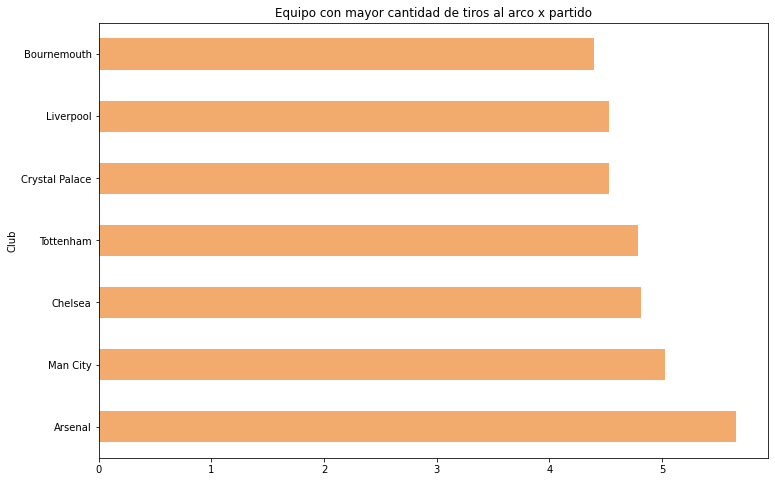

In [ ]:
from numpy.core.fromnumeric import sort
df_tiros_puerta = df_resultados.groupby(['HomeTeam']).mean().sort_values('HST',ascending=False)
df_tiros_puerta['AHSH'] = df_tiros_puerta.apply(
    lambda row: (row.HST + row.AST)/2,
    axis = 1
)
df_tiros_puerta=df_tiros_puerta.sort_values('AHSH', ascending=False)
df_tiros_puerta=df_tiros_puerta.iloc[:7]
df_tiros_puerta['AHSH'].plot(kind='barh',figsize=(12,8),title='Equipo con mayor cantidad de tiros al arco x partido', color='#F2AB6D', xlabel='Club', ylabel = 'Cantida de partidos')

In [ ]:
# Listado de jugadores filtrados por posicion de delantera de equipos seleccionados en el grafico

delanteros_arsenal = df_players
delanteros_man = df_players
delanteros_chel = df_players
delanteros_tot = df_players
delanteros_liv = df_players



delanteros_arsenal = delanteros_arsenal.loc[(df_players['club'] == 'Arsenal') & (df_players['position_cat'] == 1)]
delanteros_arsenal = delanteros_arsenal.sort_values('fpl_points', ascending = False)
delanteros_arsenal.reset_index()

delanteros_man = delanteros_man.loc[(df_players['club'] == 'Manchester+City') & (df_players['position_cat'] == 1)]
delanteros_man = delanteros_man.sort_values('fpl_points', ascending = False)
delanteros_man.reset_index()

delanteros_chel = delanteros_chel.loc[(df_players['club'] == 'Chelsea') & (df_players['position_cat'] == 1)]
delanteros_chel = delanteros_chel.sort_values('fpl_points', ascending = False)
delanteros_chel.reset_index()

delanteros_tot = delanteros_tot.loc[(df_players['club'] == 'Tottenham') & (df_players['position_cat'] == 1)]
delanteros_tot = delanteros_tot.sort_values('fpl_points', ascending = False)
delanteros_tot.reset_index()

delanteros_liv = delanteros_liv.loc[(df_players['club'] == 'Liverpool') & (df_players['position_cat'] == 1)]
delanteros_liv = delanteros_liv.sort_values('fpl_points', ascending = False)
delanteros_liv = delanteros_liv.reset_index()
#delanteros_liv= delanteros_liv.iloc[4:7]

#delanteros_arsenal[['name','club','fpl_points','position']] #si
#delanteros_man[['name','club','fpl_points','position']] #si
#delanteros_chel[['name','club','fpl_points','position']] #no
#delanteros_tot[['name','club','fpl_points','position']] #no
delanteros_liv[['name','club','fpl_points','position']] #si



,name,club,fpl_points,position
0,Roberto Firmino,Liverpool,180,SS
1,Philippe Coutinho,Liverpool,171,AM
2,Sadio Mane,Liverpool,156,LW
3,Adam Lallana,Liverpool,139,AM
4,Divock Origi,Liverpool,96,CF
5,Daniel Sturridge,Liverpool,54,CF
6,Ben Woodburn,Liverpool,5,LW
7,Sheyi Ojo,Liverpool,0,LW
8,Mohamed Salah,Liverpool,0,RW
9,Danny Ings,Liverpool,0,CF


In [ ]:
#equipos con mayor gol

equipos_goles = df_teams.sort_values('average_total_goals_per_match', ascending = False)

equipos_goles[['team_name','average_total_goals_per_match']]

,team_name,average_total_goals_per_match
8,AFC Bournemouth,3.32
0,Arsenal FC,3.26
9,Manchester United FC,3.13
2,Manchester City FC,3.11
16,Fulham FC,3.03
6,Burnley FC,2.97
13,Watford FC,2.92
10,Liverpool FC,2.92
7,Southampton FC,2.89
12,West Ham United FC,2.82


Medio campo


In [ ]:
# equipos con mayor nivel de posesion de la pelota
posesion = df_teams[['common_name', 'average_possession']].sort_values('average_possession',ascending = False)

posesion = posesion.reset_index()

posesion = posesion.drop(columns='index')

posesion

,common_name,average_possession
0,Manchester City,68
1,Chelsea,64
2,Liverpool,62
3,Tottenham Hotspur,59
4,Arsenal,58
5,Manchester United,55
6,Everton,52
7,Leicester City,51
8,West Ham United,49
9,Fulham,49


In [ ]:
# listado filtrado de jugadores de los equipos con mayor posesion

medioCampo_arsenal = df_players
medioCampo_man = df_players
medioCampo_chel = df_players
medioCampo_tot = df_players
medioCampo_liv = df_players




medioCampo_arsenal = medioCampo_arsenal.loc[(df_players['club'] == 'Arsenal') & (df_players['position_cat'] == 2)]
medioCampo_arsenal = medioCampo_arsenal.sort_values('fpl_points', ascending = False)
medioCampo_arsenal.reset_index()

medioCampo_man = medioCampo_man.loc[(df_players['club'] == 'Manchester+City') & (df_players['position_cat'] == 2)]
medioCampo_man = medioCampo_man.sort_values('fpl_points', ascending = False)
medioCampo_man.reset_index()

medioCampo_chel = medioCampo_chel.loc[(df_players['club'] == 'Chelsea') & (df_players['position_cat'] == 2)]
medioCampo_chel = medioCampo_chel.sort_values('fpl_points', ascending = False)
medioCampo_chel.reset_index()

medioCampo_tot = medioCampo_tot.loc[(df_players['club'] == 'Tottenham') & (df_players['position_cat'] == 2)]
medioCampo_tot = medioCampo_tot.sort_values('fpl_points', ascending = False)
medioCampo_tot.reset_index()

medioCampo_liv = medioCampo_liv.loc[(df_players['club'] == 'Liverpool') & (df_players['position_cat'] == 2)]
medioCampo_liv = medioCampo_liv.sort_values('fpl_points', ascending = False)
medioCampo_liv.reset_index()

#medioCampo_arsenal[['name','club','fpl_points','position']] 
#medioCampo_man[['name','club','fpl_points','position']] 
#medioCampo_chel[['name','club','fpl_points','position']] 
#medioCampo_tot[['name','club','fpl_points','position']] 
#medioCampo_liv[['name','club','fpl_points','position']] 

,name,club,fpl_points,position
216,Georginio Wijnaldum,Liverpool,149,CM
217,James Milner,Liverpool,139,CM
222,Emre Can,Liverpool,104,DM
225,Jordan Henderson,Liverpool,73,CM
227,Lucas Leiva,Liverpool,47,DM
234,Marko Grujic,Liverpool,4,CM


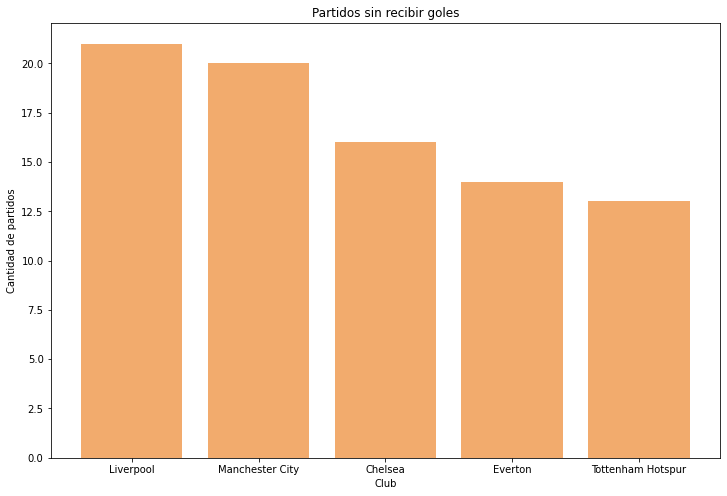

In [ ]:
# 4 equipos con mas clean sheets

df_cleansheets = df_teams.sort_values('clean_sheets', ascending = False)

df_cleansheets = df_cleansheets.iloc[:5]

x_values = df_cleansheets['common_name']
y_values = df_cleansheets['clean_sheets']
plt.figure(figsize=(12,8))
plt.title('Partidos sin recibir goles')
plt.ylabel('Cantidad de partidos')
plt.xlabel('Club')
plt.bar(x_values, y_values, color='#F2AB6D')
plt.show()


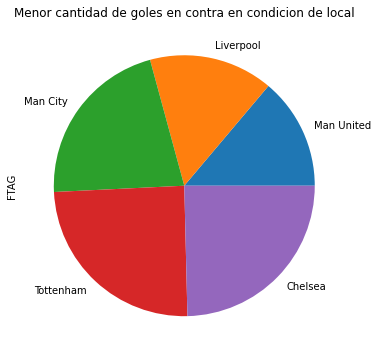

In [ ]:
#menor cantidad de goles en contra en condicion de local


enc_local = df_resultados.groupby(['HomeTeam']).sum().sort_values('FTAG' , ascending = True)
enc_local =enc_local[ 'FTAG'][:5]
enc_local.plot.pie(figsize=(6,6), title='Menor cantidad de goles en contra en condicion de local')



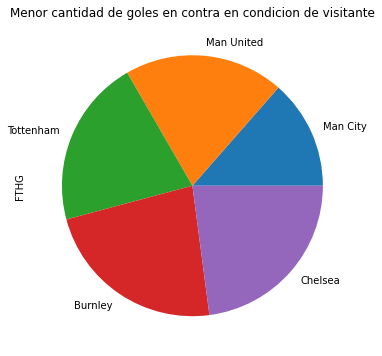

In [ ]:
#menor cantidad de goles en contra en condicion de visitante
enc_visitante = df_resultados.groupby(['AwayTeam']).sum().sort_values('FTHG' , ascending = True)
enc_visitante = enc_visitante['FTHG'][:5]
enc_visitante.plot.pie(figsize=(6,6), title='Menor cantidad de goles en contra en condicion de visitante')


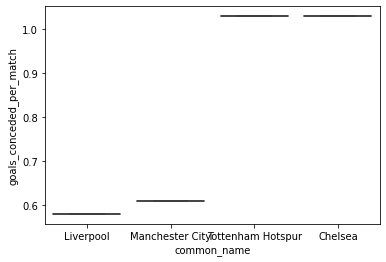

In [ ]:
#menor cantidad de goles en contra
#manchester city
encontra = df_teams[['common_name','goals_conceded_per_match']].sort_values('goals_conceded_per_match', ascending = True)

encontra = encontra.reset_index()
encontra = encontra.iloc[:4]
#encontra[['goals_conceded_per_match','common_name']].plot(kind='barh')
encontra
# encontra.plot(kind='density', subplots = True, sharex = False )
sns.boxplot(x = encontra['common_name'], 
            y = encontra['goals_conceded_per_match']
            )
# ptl.show()

In [ ]:
# listado de defensas 

defensa_arsenal = df_players
defensa_man = df_players
defensa_chel = df_players
defensa_tot = df_players
defensa_liv = df_players




defensa_arsenal = defensa_arsenal.loc[(df_players['club'] == 'Arsenal') & (df_players['position_cat'] == 3)]
defensa_arsenal = defensa_arsenal.sort_values('fpl_points', ascending = False)
defensa_arsenal=defensa_arsenal.reset_index()

defensa_man = defensa_man.loc[(df_players['club'] == 'Manchester+City') & (df_players['position_cat'] == 3)]
defensa_man = defensa_man.sort_values('fpl_points', ascending = False)
defensa_man=defensa_man.reset_index()

defensa_chel = defensa_chel.loc[(df_players['club'] == 'Chelsea') & (df_players['position_cat'] == 3)]
defensa_chel = defensa_chel.sort_values('fpl_points', ascending = False)
defensa_chel=defensa_chel.reset_index()

defensa_tot = defensa_tot.loc[(df_players['club'] == 'Tottenham') & (df_players['position_cat'] == 3)]
defensa_tot = defensa_tot.sort_values('fpl_points', ascending = False)
defensa_tot=defensa_tot.reset_index()

defensa_liv = defensa_liv.loc[(df_players['club'] == 'Liverpool') & (df_players['position_cat'] == 3)]
defensa_liv = defensa_liv.sort_values('fpl_points', ascending = False)
defensa_liv=defensa_liv.reset_index()

#defensa_arsenal[['name','club','fpl_points','position']] 
#defensa_man[['name','club','fpl_points','position']] # si
#defensa_chel[['name','club','fpl_points','position']][:5] # si 
defensa_tot[['name','club','fpl_points','position']][:5] # si
#defensa_liv[['name','club','fpl_points','position']] 

,name,club,fpl_points,position
0,Jan Vertonghen,Tottenham,126,CB
1,Toby Alderweireld,Tottenham,120,CB
2,Ben Davies,Tottenham,90,LB
3,Danny Rose,Tottenham,84,LB
4,Kieran Trippier,Tottenham,51,RB


In [ ]:
port_arsenal = df_players
port_man = df_players
port_chel = df_players
port_tot = df_players
port_liv = df_players




port_arsenal = port_arsenal.loc[(df_players['club'] == 'Arsenal') & (df_players['position_cat'] == 4)]
port_arsenal = port_arsenal.sort_values('fpl_points', ascending = False)
port_arsenal=port_arsenal.reset_index()

port_man = port_man.loc[(df_players['club'] == 'Manchester+City') & (df_players['position_cat'] == 4)]
port_man = port_man.sort_values('fpl_points', ascending = False)
port_man=port_man.reset_index()

port_chel = port_chel.loc[(df_players['club'] == 'Chelsea') & (df_players['position_cat'] == 4)]
port_chel = port_chel.sort_values('fpl_points', ascending = False)
port_chel=port_chel.reset_index()

port_tot = port_tot.loc[(df_players['club'] == 'Tottenham') & (df_players['position_cat'] == 4)]
port_tot = port_tot.sort_values('fpl_points', ascending = False)
port_tot=port_tot.reset_index()

port_liv = port_liv.loc[(df_players['club'] == 'Liverpool') & (df_players['position_cat'] == 4)]
port_liv = port_liv.sort_values('fpl_points', ascending = False)
port_liv=port_liv.reset_index()

#port_arsenal[['name','club','fpl_points','position']] 
#port_man[['name','club','fpl_points','position']] # si
port_chel[['name','club','fpl_points','position']][:5] # si 
#port_tot[['name','club','fpl_points','position']][:5] # si
#port_liv[['name','club','fpl_points','position']]

,name,club,fpl_points,position
0,Thibaut Courtois,Chelsea,141,GK
1,Willy Caballero,Chelsea,64,GK


In [ ]:
#cantidad de tarjetas por equipo

tarjetas = df_teams.sort_values('cards_total', ascending=True)
tarjetas = tarjetas[['common_name','cards_total']]
